In [1176]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import json
import matplotlib.pyplot as plt
import isodate
import datetime
import time

In [1177]:
cleaned_us_data_df = "output/cleaned_us_data.csv"

In [1178]:
cleaned_us_data_df = pd.read_csv(cleaned_us_data_df)

In [1179]:
cleaned_us_data_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'trending_date_formatted', 'trending_day', 'trending_month',
       'trending_year', 'trending_date_formatted_order',
       'publish_time_formatted', 'publish_day', 'publish_month',
       'publish_year', 'tag_count'],
      dtype='object')

In [1180]:
cleaned_us_data_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 17:13:01+00:00,Monday,November,2017,1


In [1181]:
cleaned_us_data_df["video_id"].nunique()

6347

In [1182]:
video_trend_frequency = (cleaned_us_data_df["video_id"].value_counts())

In [1183]:
video_frequency_df = pd.DataFrame(video_trend_frequency)
video_frequency_df = video_frequency_df.reset_index()
video_frequency_df.columns = ["video_id","Total Days Trending"]
video_frequency_df

,video_id,Total Days Trending
0,j4KvrAUjn6c,30
1,t4pRQ0jn23Q,29
2,QBL8IRJ5yHU,29
3,8h--kFui1JA,29
4,r-3iathMo7o,29
...,...,...
6342,yW6ORWYn3g0,1
6343,l7VfDVVxiMM,1
6344,PWrsHhAuVZg,1
6345,1QR-GsZkE3E,1


In [1184]:
video_id_publish_time_day_df = pd.merge(video_frequency_df,cleaned_us_data_df, how = "inner",on=["video_id"])
video_id_publish_time_day_df = video_id_publish_time_day_df.groupby("video_id").head(1)
video_id_publish_time_day_df.head(1)

,video_id,Total Days Trending,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,j4KvrAUjn6c,30,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,...,2018-05-14,Monday,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30


In [1185]:
video_trending_less_20_days_df = video_id_publish_time_day_df["Total Days Trending"].loc[video_id_publish_time_day_df["Total Days Trending"] < 20]
video_trending_less_20_days_df.shape

(6218,)

In [1186]:
video_trending_greater_20_days_df = video_id_publish_time_day_df["Total Days Trending"].loc[video_id_publish_time_day_df["Total Days Trending"] >= 20]
video_trending_greater_20_days_df.shape

(129,)

In [1187]:
video_trending_less_20_days_df = video_id_publish_time_day_df["Total Days Trending"].loc[video_id_publish_time_day_df["Total Days Trending"] == 1]
video_trending_less_20_days_df.shape

(707,)

In [1188]:
video_trending_less_20_days_df = video_id_publish_time_day_df["Total Days Trending"].loc[video_id_publish_time_day_df["Total Days Trending"] <10]
video_trending_less_20_days_df.shape

(5141,)

In [1189]:
5141-707

4434

In [1190]:
6218-5141

1077

In [1191]:
1077+4434+707

6218

In [1192]:
from datetime import datetime
from datetime import time

hours_list = []
minutes_list = []

for video in video_id_publish_time_day_df['publish_time_formatted']:
    time_object = datetime.strptime(video, "%Y-%m-%d %H:%M:%S%z")
    
    hours_list.append(time_object.hour)
    minutes_list.append(time_object.minute)
    
video_id_publish_time_day_df['publish_hour'] = hours_list
video_id_publish_time_day_df['publish_minutes'] = minutes_list
video_id_publish_time_day_df


,video_id,Total Days Trending,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count,publish_hour,publish_minutes
0,j4KvrAUjn6c,30,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,...,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30,18,3
30,t4pRQ0jn23Q,29,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,...,May,2018,15/05/2018,2018-05-14 14:00:03+00:00,Monday,May,2018,25,14,0
59,QBL8IRJ5yHU,29,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,...,May,2018,15/05/2018,2018-05-14 19:00:01+00:00,Monday,May,2018,47,19,0
88,8h--kFui1JA,29,18.10.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,...,May,2018,10/05/2018,2018-05-09 17:00:00+00:00,Wednesday,May,2018,5,17,0
117,r-3iathMo7o,29,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,...,May,2018,15/05/2018,2018-05-13 19:00:25+00:00,Sunday,May,2018,37,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40887,yW6ORWYn3g0,1,18.12.01,Charlamagne Defends Ginuwine After Being Label...,Breakfast Club Power 105.1 FM,24,2018-01-09T18:57:43.000Z,"the breakfast club|""power1051""|""celebrity news...",393742,11658,...,January,2018,12/01/2018,2018-01-09 18:57:43+00:00,Tuesday,January,2018,10,18,57
40888,l7VfDVVxiMM,1,17.23.11,Proto-Putty in Liquid Nitrogen & Other Crazy T...,The King of Random,27,2017-11-22T12:00:02.000Z,"proto putty|""proto""|""putty""|""diy""|""do it yours...",589827,11839,...,November,2017,23/11/2017,2017-11-22 12:00:02+00:00,Wednesday,November,2017,36,12,0
40889,PWrsHhAuVZg,1,17.04.12,"Queen Biopic Stops Production, Avengers Fighti...",John Campea,24,2017-12-02T17:54:53.000Z,"Avengers|""Infinity War""|""Trailer""|""Aliens""|""Th...",30469,1024,...,December,2017,04/12/2017,2017-12-02 17:54:53+00:00,Saturday,December,2017,15,17,54
40890,1QR-GsZkE3E,1,18.25.01,Aaron Paul Reveals What NOT to Say to Your Wif...,Jimmy Kimmel Live,24,2018-01-24T10:00:01.000Z,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",148659,2325,...,January,2018,25/01/2018,2018-01-24 10:00:01+00:00,Wednesday,January,2018,28,10,0


In [1193]:
# video_id_publish_time_day_df = cleaned_us_data_df.loc[video_frequency_df["Video Id"]]
# video_id_publish_time_day_df = video_id_publish_time_day_df.groupby("video_id").head(1)
# video_id_publish_time_day_df

In [1194]:
time_count = video_id_publish_time_day_df["publish_hour"].value_counts()
time_count_df = pd.DataFrame(time_count)
time_count_df = time_count_df.reset_index()
time_count_df.columns = ["Publishing Hour","Total per Hour of Day"]

In [1195]:
time_count_df.sum()


Publishing Hour           276
Total per Hour of Day    6347
dtype: int64

In [1196]:
sorted_time_count_df=time_count_df.sort_values(by=["Publishing Hour"],ascending=True)


In [1197]:
percent_hour_count = (sorted_time_count_df["Total per Hour of Day"]/6347)*100
sorted_time_count_df["Percentage of videos per Hour of the Day"] = percent_hour_count
sorted_time_count_df.round({"Percentage of videos per Hour of the Day":2})

,Publishing Hour,Total per Hour of Day,Percentage of videos per Hour of the Day
11,0,222,3.50
14,1,193,3.04
16,2,172,2.71
17,3,172,2.71
15,4,185,2.91
12,5,221,3.48
21,6,105,1.65
20,7,125,1.97
18,8,151,2.38
23,9,90,1.42


In [1198]:
# time_count_df.to_csv("Fig1PublishTimeSummaryStatistics.csv", index = False, header=True)

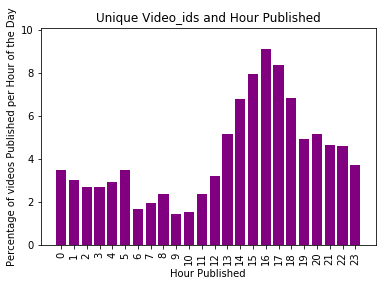

<Figure size 432x288 with 0 Axes>

In [1199]:
x_axis = sorted_time_count_df["Publishing Hour"]
y_axis = sorted_time_count_df["Percentage of videos per Hour of the Day"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Hour Published")
plt.ylabel("Percentage of videos Published per Hour of the Day")
plt.title("Unique Video_ids and Hour Published")
plt.show()
plt.savefig("ImagesObj3/Fig1PublishHour.png", dpi=100)

In [1200]:
day_count = video_id_publish_time_day_df["publish_day"].value_counts()
day_count_df = pd.DataFrame(day_count)
day_count_df = day_count_df.reset_index()
day_count_df.columns = ["Publishing Day","Total per day of the week"]

In [1201]:
percent_day_count = (day_count_df["Total per day of the week"]/6347)*100
day_count_df["Percentage per Day of the Week"] = percent_day_count
day_count_df.round({"Percentage per Day of the Week":2})

,Publishing Day,Total per day of the week,Percentage per Day of the Week
0,Wednesday,1096,17.27
1,Tuesday,1061,16.72
2,Thursday,1053,16.59
3,Friday,1046,16.48
4,Monday,985,15.52
5,Sunday,559,8.81
6,Saturday,547,8.62


In [1202]:
# day_count_df.to_csv("Fig2PublishDaySummaryStatistics.csv", index = False, header=True)

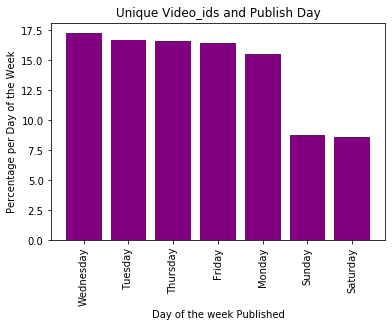

<Figure size 432x288 with 0 Axes>

In [1203]:
x_axis = day_count_df["Publishing Day"]
y_axis = day_count_df["Percentage per Day of the Week"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Percentage per Day of the Week")
plt.title("Unique Video_ids and Publish Day")
plt.show()
plt.savefig("ImagesObj3/Fig2PublishDay.png", dpi=100)

In [1204]:
month_count = video_id_publish_time_day_df["publish_month"].value_counts()
month_count_df = pd.DataFrame(month_count)
month_count_df = month_count_df.reset_index()
month_count_df.columns = ["Publishing Month","Total per Month"]

In [1205]:
percent_month_count = (month_count_df["Total per Month"]/6347)*100
month_count_df["Percentage of videos published each Month"] = percent_month_count
month_count_df.round({"Percentage of videos published each Month":2})

,Publishing Month,Total per Month,Percentage of videos published each Month
0,January,1268,19.98
1,December,1165,18.36
2,February,995,15.68
3,November,972,15.31
4,March,688,10.84
5,May,539,8.49
6,April,536,8.44
7,June,147,2.32
8,October,17,0.27
9,September,10,0.16


In [1206]:
# month_count_df.to_csv("Fig3PublishMonthSummaryStatistics.csv", index = False, header=True)

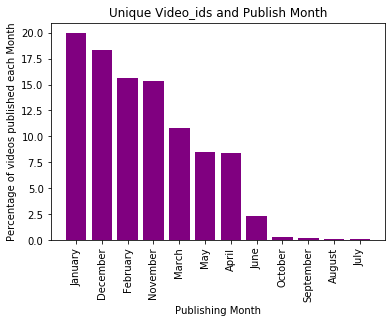

<Figure size 432x288 with 0 Axes>

In [1207]:
x_axis = month_count_df["Publishing Month"]
y_axis = month_count_df["Percentage of videos published each Month"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Publishing Month")
plt.ylabel("Percentage of videos published each Month")
plt.title("Unique Video_ids and Publish Month")
plt.show()
plt.savefig("ImagesObj3/Fig3PublishMonth.png", dpi=100)

In [1208]:
video_category = video_id_publish_time_day_df["category_name"].value_counts()
video_category_df = pd.DataFrame(video_category)
video_category_df = video_category_df.reset_index()
video_category_df.columns = ["Video Category","Total per category"]

In [1209]:
percent_category_count = (video_category_df["Total per category"]/6347)*100
video_category_df["Percentage of unique video Categories"] = percent_category_count
video_category_df.round({"Percentage of unique video Categories":2})

,Video Category,Total per category,Percentage of unique video Categories
0,Entertainment,1619,25.51
1,Music,799,12.59
2,Howto & Style,595,9.37
3,Comedy,547,8.62
4,News & Politics,505,7.96
5,People & Blogs,498,7.85
6,Sports,451,7.11
7,Science & Technology,380,5.99
8,Film & Animation,318,5.01
9,Education,250,3.94


In [1210]:
# video_category_df.to_csv("Fig4PublishVideoCategorySummaryStatistics.csv", index = False, header=True)

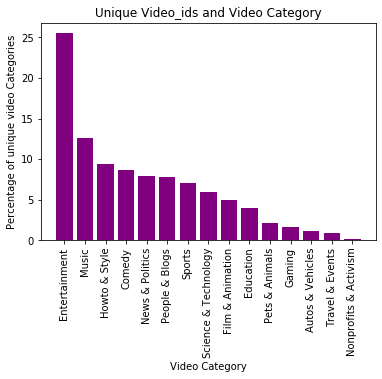

<Figure size 432x288 with 0 Axes>

In [1211]:
x_axis = video_category_df["Video Category"]
y_axis = video_category_df["Percentage of unique video Categories"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Video Category")
plt.ylabel("Percentage of unique video Categories")
plt.title("Unique Video_ids and Video Category")
plt.show()
plt.savefig("ImagesObj3/Fig4Category.png", dpi=100)

In [1212]:
video_frequency_df.head(20)

,video_id,Total Days Trending
0,j4KvrAUjn6c,30
1,t4pRQ0jn23Q,29
2,QBL8IRJ5yHU,29
3,8h--kFui1JA,29
4,r-3iathMo7o,29
5,MAjY8mCTXWk,29
6,NBSAQenU2Bk,29
7,iILJvqrAQ_w,29
8,mdWcaWBxxcY,28
9,ulNswX3If6U,28


In [1213]:
video_id_top_20_publish_time_day_df = video_id_publish_time_day_df.head(20)
video_id_top_20_publish_time_day_df

,video_id,Total Days Trending,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count,publish_hour,publish_minutes
0,j4KvrAUjn6c,30,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,...,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30,18,3
30,t4pRQ0jn23Q,29,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,...,May,2018,15/05/2018,2018-05-14 14:00:03+00:00,Monday,May,2018,25,14,0
59,QBL8IRJ5yHU,29,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,...,May,2018,15/05/2018,2018-05-14 19:00:01+00:00,Monday,May,2018,47,19,0
88,8h--kFui1JA,29,18.10.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,...,May,2018,10/05/2018,2018-05-09 17:00:00+00:00,Wednesday,May,2018,5,17,0
117,r-3iathMo7o,29,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,...,May,2018,15/05/2018,2018-05-13 19:00:25+00:00,Sunday,May,2018,37,19,0
146,MAjY8mCTXWk,29,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,...,May,2018,15/05/2018,2018-05-14 15:59:47+00:00,Monday,May,2018,17,15,59
175,NBSAQenU2Bk,29,18.15.05,Rooster Teeth Animated Adventures - Millie So ...,Rooster Teeth,1,2018-05-14T13:00:01.000Z,"Rooster Teeth|""RT""|""animation""|""television""|""f...",404162,17920,...,May,2018,15/05/2018,2018-05-14 13:00:01+00:00,Monday,May,2018,46,13,0
204,iILJvqrAQ_w,29,18.12.05,Charlie Puth - BOY [Official Audio],Charlie Puth,10,2018-05-11T04:00:34.000Z,"charlie puth|""boy""|""charlie""|""puth""|""atlantic""...",981789,55917,...,May,2018,12/05/2018,2018-05-11 04:00:34+00:00,Friday,May,2018,18,4,0
233,mdWcaWBxxcY,28,18.13.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",2766850,149643,...,May,2018,13/05/2018,2018-05-11 09:23:16+00:00,Friday,May,2018,8,9,23
261,ulNswX3If6U,28,18.12.05,Selena Gomez - Back To You (Lyric Video),Selena Gomez,1,2018-05-10T16:00:11.000Z,"selena gomez|""13 reasons why""|""back to you""|""s...",3969429,409750,...,May,2018,12/05/2018,2018-05-10 16:00:11+00:00,Thursday,May,2018,7,16,0


In [1214]:
# video_id_top_20_publish_time_day = cleaned_us_data_df.loc[video_frequency_df.head(20)["Video Ids"]]
# video_id_top_20_publish_time_day_df = video_id_top_20_publish_time_day.groupby("video_id").head(1)
# video_id_top_20_publish_time_day_df

In [1215]:
top_20_time_count = video_id_top_20_publish_time_day_df["publish_hour"].value_counts()
top_20_time_count_df = pd.DataFrame(top_20_time_count)
top_20_time_count_df = top_20_time_count_df.reset_index()
top_20_time_count_df.columns = ["Publishing Hour","Total per Hour of the Day"]

In [1216]:
sorted_top_20_time_count_df=top_20_time_count_df.sort_values(by=["Publishing Hour"],ascending=True)
sorted_top_20_time_count_df

,Publishing Hour,Total per Hour of the Day
12,4,1
11,9,1
10,11,1
9,12,1
2,13,3
8,14,1
7,15,1
6,16,1
1,17,3
5,18,1


In [1217]:
# top_20_time_count_df.to_csv("Fig5PublishHourSummaryStatistics.csv", index = False, header=True)

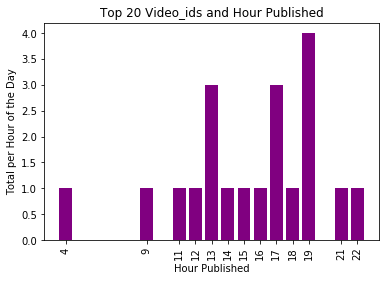

<Figure size 432x288 with 0 Axes>

In [1218]:
x_axis = sorted_top_20_time_count_df["Publishing Hour"]
y_axis = sorted_top_20_time_count_df["Total per Hour of the Day"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Hour Published")
plt.ylabel("Total per Hour of the Day")
plt.title("Top 20 Video_ids and Hour Published")
plt.show()
plt.savefig("ImagesObj3/Fig5PublishHour.png", dpi=100)

In [1219]:
top_20_day_count = video_id_top_20_publish_time_day_df["publish_day"].value_counts()
top_20_day_count_df = pd.DataFrame(top_20_day_count)
top_20_day_count_df = top_20_day_count_df.reset_index()
top_20_day_count_df.columns = ["Publishing Day","Total per day of the week"]

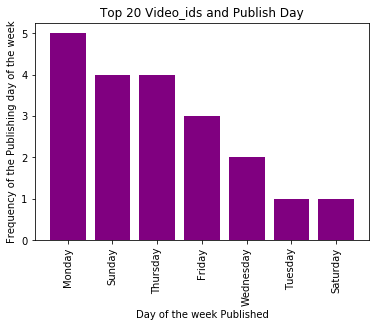

<Figure size 432x288 with 0 Axes>

In [1220]:
x_axis = top_20_day_count_df["Publishing Day"]
y_axis = top_20_day_count_df["Total per day of the week"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Top 20 Video_ids and Publish Day")
plt.show()
plt.savefig("ImagesObj3/Fig6Top20Day.png", dpi=100)

In [1221]:
top_20_month_count = video_id_top_20_publish_time_day_df["publish_month"].value_counts()
top_20_month_count_df = pd.DataFrame(top_20_month_count)
top_20_month_count_df = top_20_month_count_df.reset_index()
top_20_month_count_df.columns = ["Publishing Month","Total per Month"]
top_20_month_count_df

,Publishing Month,Total per Month
0,May,20


In [1222]:
top_20_video_category = video_id_top_20_publish_time_day_df["category_name"].value_counts()
top_20_video_category_df = pd.DataFrame(top_20_video_category)
top_20_video_category_df = top_20_video_category_df.reset_index()
top_20_video_category_df.columns = ["Video Category","Total per category"]
top_20_video_category_df

,Video Category,Total per category
0,Entertainment,6
1,Music,5
2,Film & Animation,3
3,Science & Technology,2
4,Comedy,2
5,Education,1
6,Howto & Style,1


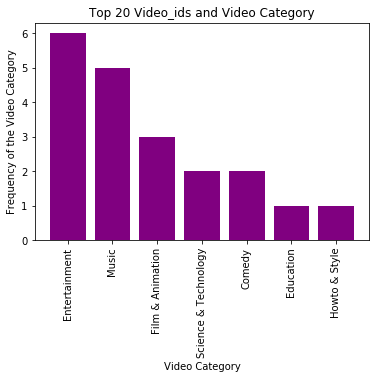

<Figure size 432x288 with 0 Axes>

In [1223]:
x_axis = top_20_video_category_df["Video Category"]
y_axis = top_20_video_category_df["Total per category"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Video Category")
plt.ylabel("Frequency of the Video Category")
plt.title("Top 20 Video_ids and Video Category")
plt.show()
plt.savefig("ImagesObj3/Fig7Top20Category.png", dpi=100)

In [1224]:
video_trending_greater_20_days_df = video_id_publish_time_day_df.loc[video_id_publish_time_day_df["Total Days Trending"] >= 20]

In [1225]:
time_count_20_more_days_trending = video_trending_greater_20_days_df["publish_hour"].value_counts()
time_count_20_more_days_trending_df = pd.DataFrame(time_count_20_more_days_trending)
time_count_20_more_days_trending_df = time_count_20_more_days_trending_df.reset_index()
time_count_20_more_days_trending_df.columns = ["Publishing Hour","Total per Hour of Day"]

In [1226]:
time_count_20_more_days_trending_df.sum()

Publishing Hour          276
Total per Hour of Day    129
dtype: int64

In [1227]:
sorted_time_count_20_more_days_trending_df=time_count_20_more_days_trending_df.sort_values(by=["Publishing Hour"],ascending=True)

In [1228]:
percent_hour_count = (sorted_time_count_20_more_days_trending_df["Total per Hour of Day"]/129)*100
sorted_time_count_20_more_days_trending_df["Percentage of videos per Hour of the Day"] = percent_hour_count
sorted_time_count_20_more_days_trending_df.round({"Percentage of videos per Hour of the Day":2})

,Publishing Hour,Total per Hour of Day,Percentage of videos per Hour of the Day
18,0,2,1.55
12,1,4,3.10
22,2,1,0.78
21,3,1,0.78
4,4,9,6.98
19,5,1,0.78
20,6,1,0.78
13,7,4,3.10
23,8,1,0.78
11,9,4,3.10


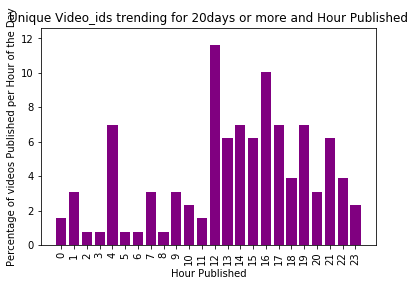

<Figure size 432x288 with 0 Axes>

In [1229]:
x_axis = sorted_time_count_20_more_days_trending_df["Publishing Hour"]
y_axis = sorted_time_count_20_more_days_trending_df["Percentage of videos per Hour of the Day"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Hour Published")
plt.ylabel("Percentage of videos Published per Hour of the Day")
plt.title("Unique Video_ids trending for 20days or more and Hour Published")
plt.show()
plt.savefig("ImagesObj3/Fig8PublishHour.png", dpi=100)

In [1233]:
day_count_20_more_days_trending = video_trending_greater_20_days_df["publish_day"].value_counts()
day_count_20_more_days_trending_df = pd.DataFrame(day_count_20_more_days_trending)
day_count_20_more_days_trending_df = day_count_20_more_days_trending_df.reset_index()
day_count_20_more_days_trending_df.columns = ["Publishing Day","Total per day of the week"]

In [1234]:
percent_day_count = (day_count_20_more_days_trending_df["Total per day of the week"]/129)*100
day_count_20_more_days_trending_df["Percentage per Day of the Week"] = percent_day_count
day_count_20_more_days_trending_df.round({"Percentage per Day of the Week":2})

,Publishing Day,Total per day of the week,Percentage per Day of the Week
0,Thursday,28,21.71
1,Friday,26,20.16
2,Tuesday,25,19.38
3,Wednesday,18,13.95
4,Sunday,15,11.63
5,Monday,13,10.08
6,Saturday,4,3.10


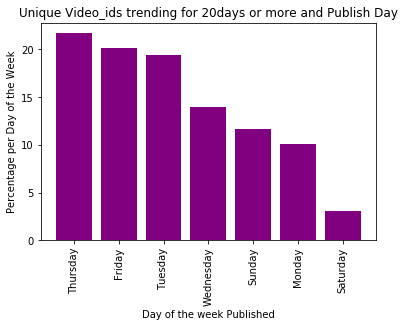

<Figure size 432x288 with 0 Axes>

In [1235]:
x_axis = day_count_20_more_days_trending_df["Publishing Day"]
y_axis = day_count_20_more_days_trending_df["Percentage per Day of the Week"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Percentage per Day of the Week")
plt.title("Unique Video_ids trending for 20days or more and Publish Day")
plt.show()
plt.savefig("ImagesObj3/Fig9PublishDay.png", dpi=100)

In [1237]:
month_count_20_more_days_trending = video_trending_greater_20_days_df["publish_month"].value_counts()
month_count_20_more_days_trending_df = pd.DataFrame(month_count_20_more_days_trending)
month_count_20_more_days_trending_df = month_count_20_more_days_trending_df.reset_index()
month_count_20_more_days_trending_df.columns = ["Publishing Month","Total per Month"]

In [1238]:
percent_month_count = (month_count_20_more_days_trending_df["Total per Month"]/129)*100
month_count_20_more_days_trending_df["Percentage of videos published each Month"] = percent_month_count
month_count_20_more_days_trending_df.round({"Percentage of videos published each Month":2})

,Publishing Month,Total per Month,Percentage of videos published each Month
0,May,126,97.67
1,April,3,2.33


In [1239]:
video_category_20_more_days_trending = video_trending_greater_20_days_df["category_name"].value_counts()
video_category_20_more_days_trending_df = pd.DataFrame(video_category_20_more_days_trending)
video_category_20_more_days_trending_df = video_category_20_more_days_trending_df.reset_index()
video_category_20_more_days_trending_df.columns = ["Video Category","Total per category"]

In [1240]:
percent_category_count = (video_category_20_more_days_trending_df["Total per category"]/129)*100
video_category_20_more_days_trending_df["Percentage of unique video Categories"] = percent_category_count
video_category_20_more_days_trending_df.round({"Percentage of unique video Categories":2})

,Video Category,Total per category,Percentage of unique video Categories
0,Music,43,33.33
1,Entertainment,31,24.03
2,Howto & Style,12,9.30
3,Gaming,8,6.20
4,Comedy,7,5.43
5,Film & Animation,7,5.43
6,People & Blogs,6,4.65
7,Science & Technology,5,3.88
8,Pets & Animals,4,3.10
9,Education,3,2.33


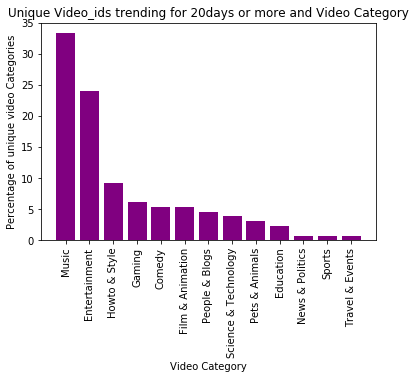

<Figure size 432x288 with 0 Axes>

In [1241]:
x_axis = video_category_20_more_days_trending_df["Video Category"]
y_axis = video_category_20_more_days_trending_df["Percentage of unique video Categories"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Video Category")
plt.ylabel("Percentage of unique video Categories")
plt.title("Unique Video_ids trending for 20days or more and Video Category")
plt.show()
plt.savefig("ImagesObj3/Fig10Category.png", dpi=100)

In [ ]:
# video_id_20 = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U","mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"]
# publish_time_20 = [18, 17, 19, 16, 14, 19, 4, 13, 20, 16, 9, 12, 17, 21, 13, 17, 21, 11, 13, 4]

In [ ]:
# x_axis = video_id_20
# y_axis = publish_time_20
# plt.plot(x_axis,y_axis,marker='o', color='blue')
# plt.xticks(rotation='vertical')
# plt.xlabel("Top 20 Video_ids")
# plt.ylabel("Publish Time")
# plt.title("Top 20 Video_ids and Publish Time")
# plt.gcf
# plt.show()

In [ ]:
result_trend_1_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "j4KvrAUjn6c"]

In [ ]:
result_trend_1_df.iloc[[0]]

In [ ]:
publish_time_j4KvrAUjn6c= result_trend_1_df[['publish_time_formatted', 'publish_day']]
publish_time_j4KvrAUjn6c.head(1)

In [ ]:
dates = list(result_trend_1_df["trending_date_formatted_order"])

In [ ]:
views = list(result_trend_1_df["views"])

In [ ]:
likes = list(result_trend_1_df["likes"])

In [ ]:
x_axis = dates
y_axis = views
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: j4KvrAUjn6c")
# plt.gcf
plt.show()

In [ ]:
x_axis = dates
y_axis = likes
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("likes")
plt.title("Trending Date and likes for video ID: j4KvrAUjn6c")
# plt.gcf
plt.show()

In [ ]:
result_trend_2_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "8h--kFui1JA"]

In [ ]:
publish_time_8hkFui1JA = result_trend_2_df[['publish_time_formatted','publish_day']]
publish_time_8hkFui1JA.head(1)

In [ ]:
dates_2 = list(result_trend_2_df["trending_date_formatted_order"])

In [ ]:
views_2 = list(result_trend_2_df["views"])

In [ ]:
likes_2 = list(result_trend_2_df["likes"])

In [ ]:
x_axis = dates_2
y_axis = views_2
plt.plot(x_axis,y_axis,marker='o', color='orange')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: 8h--kFui1JA")
# plt.gcf
plt.show()

In [ ]:
x_axis = dates_2
y_axis = likes_2
plt.plot(x_axis,y_axis,marker='o', color='orange')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Likes")
plt.title("Trending Date and Likes for video ID: 8h--kFui1JA")
# plt.gcf
plt.show()

In [ ]:
result_trend_3_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "r-3iathMo7o"]


In [ ]:
publish_time_r3iathMo7o = result_trend_3_df[['publish_time_formatted', 'publish_day']]
publish_time_r3iathMo7o.head(1)

In [ ]:
dates_3 = list(result_trend_3_df["trending_date_formatted_order"])

In [ ]:
views_3 = list(result_trend_3_df["views"])

In [ ]:
likes_3 = list(result_trend_3_df["likes"])

In [ ]:
x_axis = dates_3
y_axis = views_3
plt.plot(x_axis,y_axis,marker='o', color='purple')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: r-3iathMo7o")
# plt.gcf
plt.show()

In [ ]:
x_axis = dates_3
y_axis = likes_3
plt.plot(x_axis,y_axis,marker='o', color='purple')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Likes")
plt.title("Trending Date and Likes for video ID: r-3iathMo7o")
# plt.gcf
plt.show()

j4KvrAUjn6c	30
8h--kFui1JA	29
r-3iathMo7o	29
MAjY8mCTXWk	29
t4pRQ0jn23Q	29
QBL8IRJ5yHU	29
iILJvqrAQ_w	29
NBSAQenU2Bk	29
vjSohj-Iclc	28
ulNswX3If6U	28

In [ ]:
result_trend_4_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "MAjY8mCTXWk"]

In [ ]:
publish_time_MAjY8mCTXWk = result_trend_4_df[['publish_time_formatted', 'publish_day']]
publish_time_MAjY8mCTXWk.head(1)

In [ ]:
result_trend_5_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "t4pRQ0jn23Q"]

In [ ]:
publish_time_t4pRQ0jn23Q = result_trend_5_df[['publish_time_formatted', 'publish_day']]
publish_time_t4pRQ0jn23Q.head(1)

In [ ]:
result_trend_6_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "QBL8IRJ5yHU"]

In [ ]:
publish_time_QBL8IRJ5yHU = result_trend_6_df[['publish_time_formatted', 'publish_day']]
publish_time_QBL8IRJ5yHU.head(1)

In [ ]:
result_trend_7_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "iILJvqrAQ_w"]

In [ ]:
publish_time_iILJvqrAQ_w = result_trend_7_df[['publish_time_formatted', 'publish_day']]
publish_time_iILJvqrAQ_w.head(1)

In [ ]:
result_trend_8_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "NBSAQenU2Bk"]

In [ ]:
publish_time_NBSAQenU2Bk = result_trend_8_df[['publish_time_formatted', 'publish_day']]
publish_time_NBSAQenU2Bk.head(1)

In [ ]:
result_trend_9_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "vjSohj-Iclc"]

In [ ]:
publish_time_vjSohjIclc = result_trend_9_df[['publish_time_formatted', 'publish_day']]
publish_time_vjSohjIclc.head(1)

In [ ]:
result_trend_10_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "ulNswX3If6U"]

In [ ]:
publish_time_ulNswX3If6U = result_trend_10_df[['publish_time_formatted', 'publish_day']]
publish_time_ulNswX3If6U.head(1)

In [ ]:
publish_time_day_df = cleaned_us_data_df.groupby(["video_id"])
# publish_time_day_df.reset_index(inplace=True)
# publish_time_day_df["trending_date"].count()

In [ ]:
publish_df = publish_time_day_df[['publish_time_formatted', 'publish_day', 'publish_month']]
publish_df.head(15)

In [ ]:
cleaned_us_data_df["publish_time_formatted"]

In [ ]:
video_frequency = pd.DataFrame(video_trend_frequency)
video_frequency.tail(20)

"JR4oPuV3CWg", "qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"

In [ ]:
# publish_time_day_bottom_20 = cleaned_us_data_df.iloc[["JR4oPuV3CWg","qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"]]
# publish_time_day_bottom_20.groupby("video_id").head(1)

In [ ]:
# video_id_bottom_20 = ["JR4oPuV3CWg", "qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"]
# publish_time_bottom_20 = []

In [ ]:
# x_axis = video_id_bottom_20
# y_axis = publish_time_bottom_20
# plt.plot(x_axis,y_axis,marker='o', color='blue')
# plt.xticks(rotation='vertical')
# plt.xlabel("Bottom 20 Video_ids")
# plt.ylabel("Publish Time")
# plt.title("Bottom 20 Video_ids and Publish Time")
# plt.gcf
# plt.show()

In [ ]:
# Code from Shweta
# #Most viewed category for each month
cleaned_us_data_group_by_months_df = cleaned_us_data_df.groupby("publish_month")
cleaned_us_data_group_by_months_category = cleaned_us_data_group_by_months_df["category_id"].value_counts()
cleaned_us_data_months_category_count_df = cleaned_us_data_group_by_months_category.reset_index(name = 'category_count')
cleaned_us_data_months_category_max_df = cleaned_us_data_months_category_count_df.loc[cleaned_us_data_months_category_count_df.groupby("publish_month")["category_count"].idxmax()]
cleaned_us_data_months_category_max_df

In [ ]:
# Code from Shweta
#Top 5 videos for each categories
# top_5_vidoes_foreach_categories_cleaned_us_data_df =  cleaned_us_data_df.sort_values('views',ascending = False).groupby('category_id').head(5)
# unique_top_5_vidoes_foreach_categories_cleaned_us_data_df = top_5_vidoes_foreach_categories_cleaned_us_data_df["video_id"].unique()
# top_vidoes_details_categories_cleaned_us_data_df=cleaned_us_data_df.loc[cleaned_us_data_df["video_id"].isin(unique_top_5_vidoes_foreach_categories_cleaned_us_data_df)]
# top_vidoes_details_categories_cleaned_us_data_df = top_vidoes_details_categories_cleaned_us_data_df.sort_values(by=['video_id', 'views'])
# top_vidoes_details_categories_cleaned_us_data_df['views_growth'] = np.where(top_vidoes_details_categories_cleaned_us_data_df.video_id == top_vidoes_details_categories_cleaned_us_data_df.video_id.shift(1), top_vidoes_details_categories_cleaned_us_data_df.views.diff(), 0)
# top_vidoes_details_categories_cleaned_us_data_df['trending_date_diffs'] = (pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["trending_date_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern') - pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["publish_time_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern')).dt.days
# top_vidoes_details_categories_cleaned_us_data_df_v1 = top_vidoes_details_categories_cleaned_us_data_df[['video_id', 'category_id','views','publish_time','trending_date_formatted',"publish_time_formatted","views_growth","trending_date_diffs"]]
# top_vidoes_details_categories_cleaned_us_data_df_v1